# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install waterfallcharts
!pip install fast_ml
!pip install mlxtend

# Import Library

In [3]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.feature_selection import RFE                      
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import sklearn.datasets as skd
import sklearn.ensemble as ske
import waterfall_chart


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Membaca data dari Google Drive

In [4]:
# membaca data .csv untuk dilakukan preparation
df=pd.read_csv('/content/drive/MyDrive/Riset/FileClean_ready_new.csv') 
display(df.describe())

,DPN,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,3374.693632,100400.741824,2805.984509,70.004010,0.199907,1.145157,302.254423,1.507325,6.014888,-0.018657,0.809824,0.094861,-0.097466,-0.000225,0.001046,0.001223
std,1491.144052,178.971368,8.893708,0.057783,0.000345,0.003136,0.753820,0.006733,8.809229,10.808131,0.666162,0.062491,0.184239,0.025946,0.012360,0.163412
min,39.000000,100018.000000,2787.000000,69.890000,0.199000,1.139000,300.460000,1.494000,-10.300000,-30.000000,-0.379300,0.002400,-0.674500,-0.081600,-0.046600,-0.485900
25%,2289.000000,100303.000000,2800.000000,69.980000,0.200000,1.142000,301.740000,1.502000,0.170000,0.000000,0.219600,0.045600,-0.156500,-0.000900,-0.000600,-0.002800
50%,4401.000000,100394.000000,2805.000000,70.000000,0.200000,1.145000,302.260000,1.507000,8.650000,0.000000,0.965300,0.084500,-0.090400,-0.000100,0.001800,0.002200
75%,4558.000000,100488.000000,2811.000000,70.020000,0.200000,1.147000,302.690000,1.512000,13.010000,0.000000,1.431300,0.123800,-0.058400,0.000200,0.003100,0.005700
max,4821.000000,100728.000000,2913.000000,71.230000,0.204000,1.153000,304.150000,1.540000,21.230000,30.000000,2.034400,0.301900,0.561000,0.082300,0.046300,0.483300


# Data Cleaning

# Remove DPN dan Deteksi Missing Value
missing value : data-data yang tidak terdeteksi/tidak ada data(kosong)

In [5]:
#Drop kolom DPN karena merupakan counter 
df = df.drop(['DPN'], axis = 1)
# Deteksi Adanya Missing Value
print('Status Missing Values :',df.isna().values.any())
print(df.isna().sum().sort_values(ascending=False))

Status Missing Values : False
P0       0
Q0       0
V0       0
MA       0
RHO      0
T0       0
RE       0
ALFA     0
BETA     0
CL       0
CD       0
CM25     0
CYAW     0
CROLL    0
CY       0
dtype: int64


Cek Duplicated value 

In [6]:
df[df.duplicated()]

,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY


# Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. 
Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

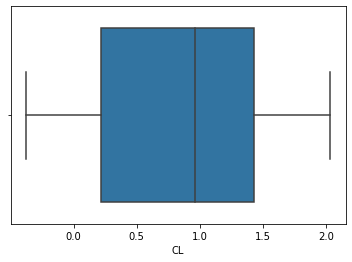

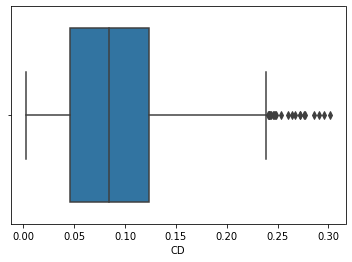

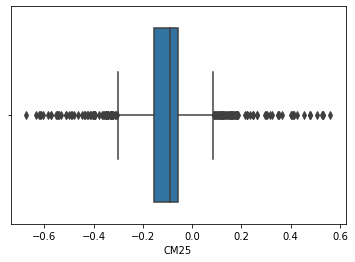

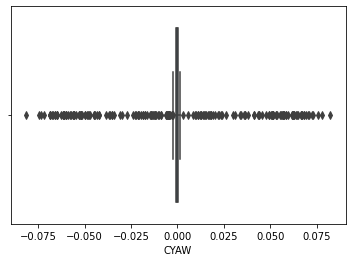

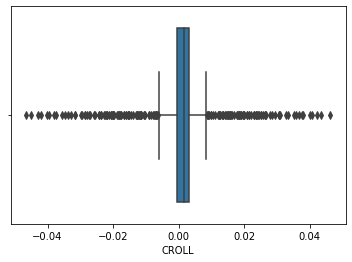

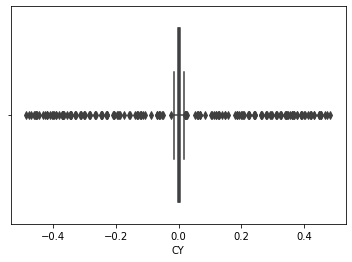

In [7]:
# Deteksi adanya Outlier Output dengan metode (Boxplot)

plt.figure()
sns.boxplot(x=df['CL'])
plt.show()
sns.boxplot(x=df['CD'])
plt.show()
sns.boxplot(x=df['CM25'])
plt.show()
sns.boxplot(x=df['CYAW'])
plt.show()
sns.boxplot(x=df['CROLL'])
plt.show()
sns.boxplot(x=df['CY'])
plt.show()

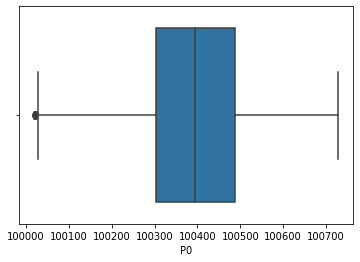

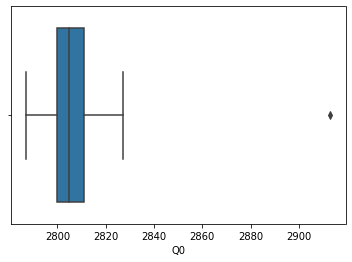

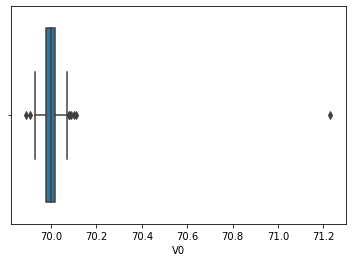

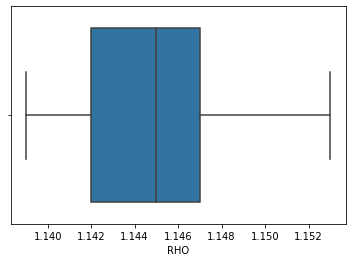

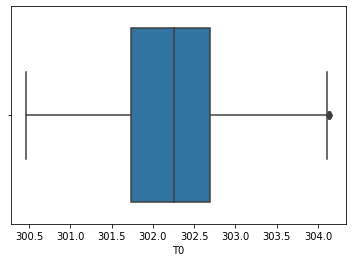

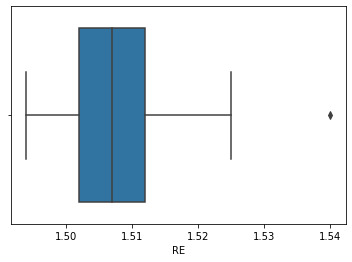

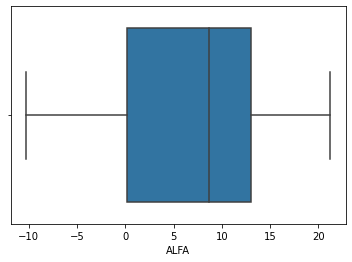

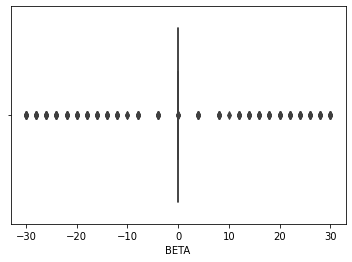

In [8]:
# Deteksi adanya Outlier input dengan metode (Boxplot)

plt.figure()
sns.boxplot(x=df['P0'])
plt.show()
sns.boxplot(x=df['Q0'])
plt.show()
sns.boxplot(x=df['V0'])
plt.show()
sns.boxplot(x=df['RHO'])
plt.show()
sns.boxplot(x=df['T0'])
plt.show()
sns.boxplot(x=df['RE'])
plt.show()
sns.boxplot(x=df['ALFA'])
plt.show()
sns.boxplot(x=df['BETA'])
plt.show()

# Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). 

In [9]:
# Handling Output Outlier with IQR
Q1 = (df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA', 'CL','CD','CM25','CYAW','CROLL','CY']]).quantile(0.25)
Q3 = (df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA', 'CL','CD','CM25','CYAW','CROLL','CY']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data Output setelah ditangani Outlier: ')
print(df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA','CL','CD','CM25','CYAW','CROLL','CY']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
P0       100765.50000
Q0         2827.50000
V0           70.08000
MA            0.20000
RHO           1.15450
T0          304.11500
RE            1.52700
ALFA         32.27000
CL            3.24885
CD            0.24110
CM25          0.08875
CYAW          0.00185
CROLL         0.00865
CY            0.01845
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
P0       100025.50000
Q0         2783.50000
V0           69.92000
MA            0.20000
RHO           1.13450
T0          300.31500
RE            1.48700
ALFA        -19.09000
CL           -1.59795
CD           -0.07170
CM25         -0.30365
CYAW         -0.00255
CROLL        -0.00615
CY           -0.01555
dtype: float64

Persebaran data Output setelah ditangani Outlier: 
                  P0           Q0          V0            MA         RHO  \
count     581.000000   581.000000  581.000000  5.810000e+02  581.000000   
mean   100400.848537  2805.837349   70.001997  2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


CEK KEMBALI KEBERADAAN OUTLIER

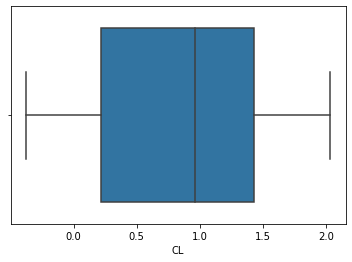

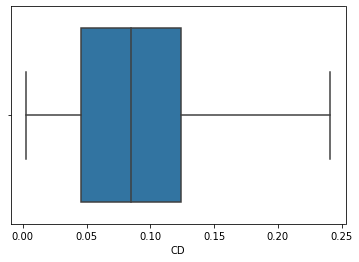

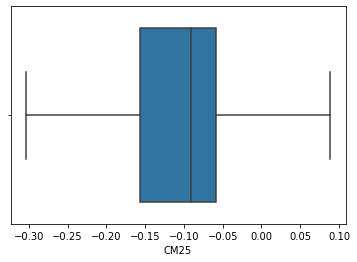

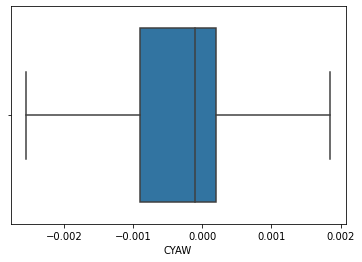

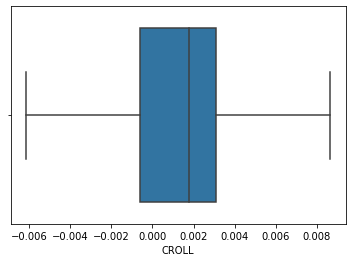

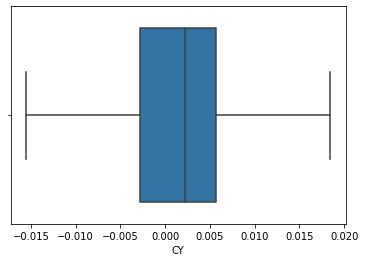

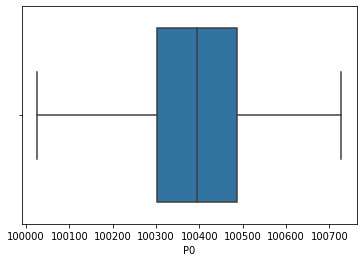

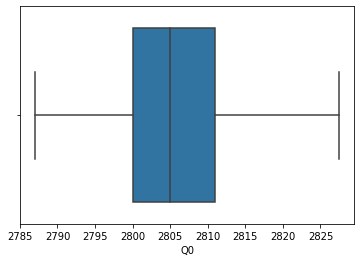

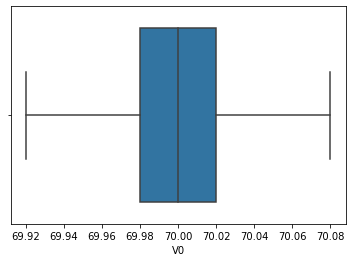

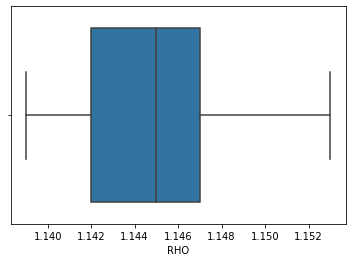

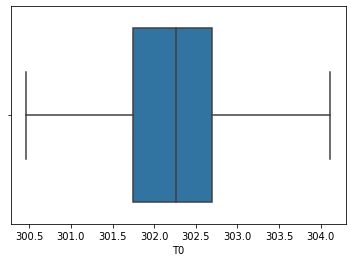

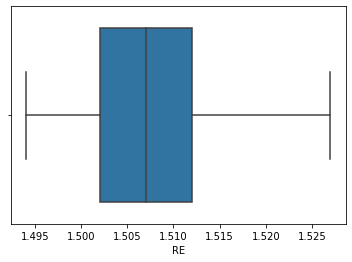

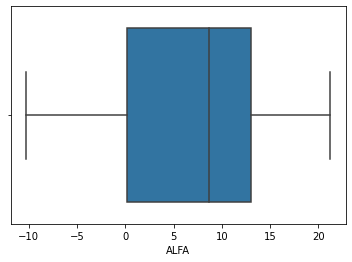

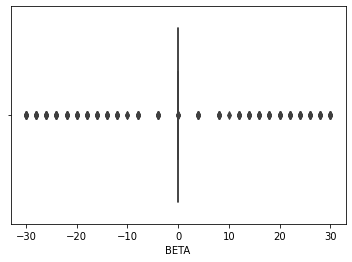

In [10]:
# Deteksi adanya Outlier output dengan metode (Boxplot) setelah metode IQR

plt.figure()
sns.boxplot(x=df['CL'])
plt.show()
sns.boxplot(x=df['CD'])
plt.show()
sns.boxplot(x=df['CM25'])
plt.show()
sns.boxplot(x=df['CYAW'])
plt.show()
sns.boxplot(x=df['CROLL'])
plt.show()
sns.boxplot(x=df['CY'])
plt.figure()
sns.boxplot(x=df['P0'])
plt.show()
sns.boxplot(x=df['Q0'])
plt.show()
sns.boxplot(x=df['V0'])
plt.show()
sns.boxplot(x=df['RHO'])
plt.show()
sns.boxplot(x=df['T0'])
plt.show()
sns.boxplot(x=df['RE'])
plt.show()
sns.boxplot(x=df['ALFA'])
plt.show()
sns.boxplot(x=df['BETA'])
plt.show()

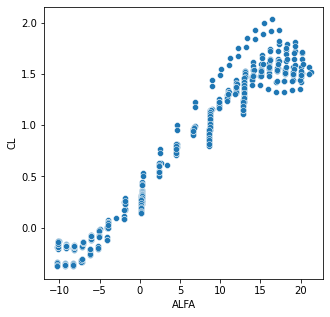

In [11]:
# PLot ALFA vs CL sebelum Normalisasi
plt.figure(figsize = (5,5))
ax = sns.scatterplot(x='ALFA', y=('CL'), data=df)

# Normalisasi Data

In [12]:
#Normalisasi Data Total
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
df_minmax = pd.DataFrame(df_scaled)
df_minmax.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/df_minmax.csv', index=False, header=True)

In [14]:
df_minmax

,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,0.689680,0.987654,0.6875,0.0,1.000000,0.000000,0.939394,0.002220,0.5,0.016696,0.694596,1.0,0.000000,0.584459,0.930882
1,0.682562,0.962963,0.6250,0.0,1.000000,0.024624,0.909091,0.033619,0.5,0.015495,0.629661,1.0,0.000000,0.672297,0.963235
2,0.674021,0.839506,0.3125,0.0,0.928571,0.051984,0.848485,0.065017,0.5,0.013631,0.540427,1.0,0.306818,0.516892,0.630882
3,0.664057,0.888889,0.5625,0.0,0.928571,0.065663,0.878788,0.098319,0.5,0.029871,0.444491,1.0,0.147727,0.692568,0.819118
4,0.658363,0.864198,0.4375,0.0,0.928571,0.073871,0.848485,0.131304,0.5,0.061275,0.358609,1.0,0.375000,0.523649,0.598529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,0.654093,0.592593,0.2500,0.0,0.714286,0.325581,0.575758,0.813828,0.5,0.940713,0.788018,0.0,0.625000,0.415541,0.310294
577,0.661210,0.617284,0.3750,0.0,0.714286,0.328317,0.606061,0.845227,0.5,0.952397,0.837453,0.0,0.534091,0.429054,0.327941
578,0.669751,0.765432,0.8125,0.0,0.642857,0.336525,0.636364,0.875040,0.5,0.913494,0.949309,0.0,0.102273,0.000000,0.127941
579,0.686833,0.617284,0.4375,0.0,0.642857,0.344733,0.575758,0.904535,0.5,0.883167,1.000000,0.0,0.647727,0.300676,0.336765


## Describe Data set

In [13]:
df_minmax.describe() # deskripsi data

,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
count,581.000000,581.000000,581.000000,581.0,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.534304,0.465120,0.512478,0.0,0.439759,0.490913,0.403119,0.517440,0.499689,0.492656,0.384086,0.511921,0.503364,0.505437,0.508441
std,0.254442,0.191464,0.167923,0.0,0.224015,0.206150,0.201372,0.279392,0.180136,0.275992,0.252957,0.291318,0.304580,0.294464,0.296713
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395018,0.320988,0.375000,0.0,0.214286,0.350205,0.242424,0.332065,0.500000,0.248125,0.180980,0.375000,0.375000,0.375000,0.375000
50%,0.524555,0.444444,0.500000,0.0,0.428571,0.492476,0.393939,0.601015,0.500000,0.557070,0.343946,0.543451,0.556818,0.537162,0.522059
75%,0.658363,0.592593,0.625000,0.0,0.571429,0.610123,0.545455,0.739296,0.500000,0.750135,0.508588,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_minmax.shape # bentuk/dimensi dataset (baris,kolom)

(581, 15)

In [16]:
df_minmax.columns # daftar nama kolom

Index(['P0', 'Q0', 'V0', 'MA', 'RHO', 'T0', 'RE', 'ALFA', 'BETA', 'CL', 'CD',
       'CM25', 'CYAW', 'CROLL', 'CY'],
      dtype='object')

In [17]:
df_minmax.dtypes # tipe data untuk tiap kolom

P0       float64
Q0       float64
V0       float64
MA       float64
RHO      float64
T0       float64
RE       float64
ALFA     float64
BETA     float64
CL       float64
CD       float64
CM25     float64
CYAW     float64
CROLL    float64
CY       float64
dtype: object

In [18]:
df_minmax.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P0      581 non-null    float64
 1   Q0      581 non-null    float64
 2   V0      581 non-null    float64
 3   MA      581 non-null    float64
 4   RHO     581 non-null    float64
 5   T0      581 non-null    float64
 6   RE      581 non-null    float64
 7   ALFA    581 non-null    float64
 8   BETA    581 non-null    float64
 9   CL      581 non-null    float64
 10  CD      581 non-null    float64
 11  CM25    581 non-null    float64
 12  CYAW    581 non-null    float64
 13  CROLL   581 non-null    float64
 14  CY      581 non-null    float64
dtypes: float64(15)
memory usage: 68.2 KB


## Cleaning data hasil normalisasi

In [19]:
#Drop konstan zero variables MA
df_minmax.drop(["MA"], axis = 1, inplace = True)

# Deteksi Adanya Missing Value
print('Status Missing Values :',df_minmax.isna().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_minmax.isna().sum().sort_values(ascending=False))

Status Missing Values : False

Jumlah Missing Values masing-masing kolom, adalah:
P0       0
Q0       0
V0       0
RHO      0
T0       0
RE       0
ALFA     0
BETA     0
CL       0
CD       0
CM25     0
CYAW     0
CROLL    0
CY       0
dtype: int64


## Visual Display Data hasil Normalisasi Minmax

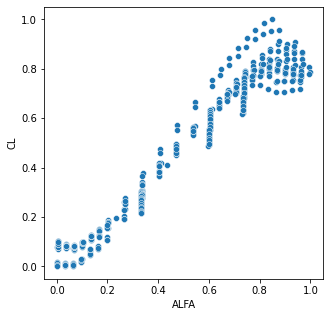

In [22]:
#Plot setelah Normalisasi
plt.figure(figsize = (5,5))
ax = sns.scatterplot(x='ALFA', y=('CL'), data=df_minmax)

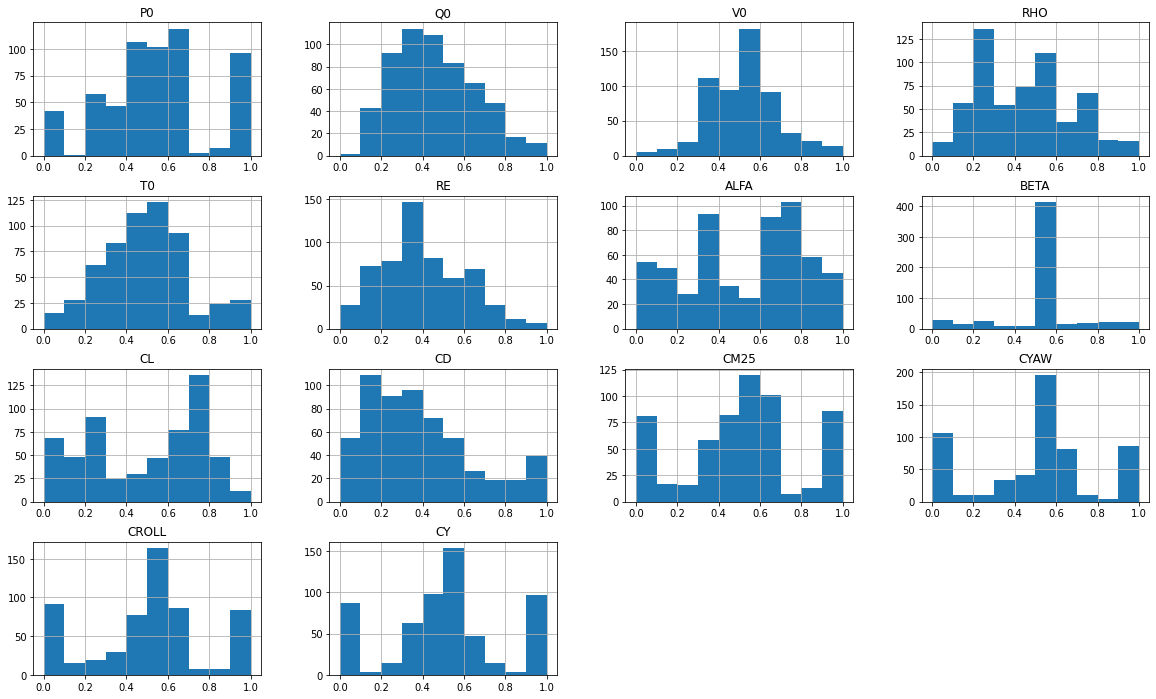

In [23]:
# Data histogram analysis
df_minmax.hist(figsize=(20,12))
plt.show()

In [27]:
#PairPlot Analysis
sns.pairplot(df_minmax)

Output hidden; open in https://colab.research.google.com to view.

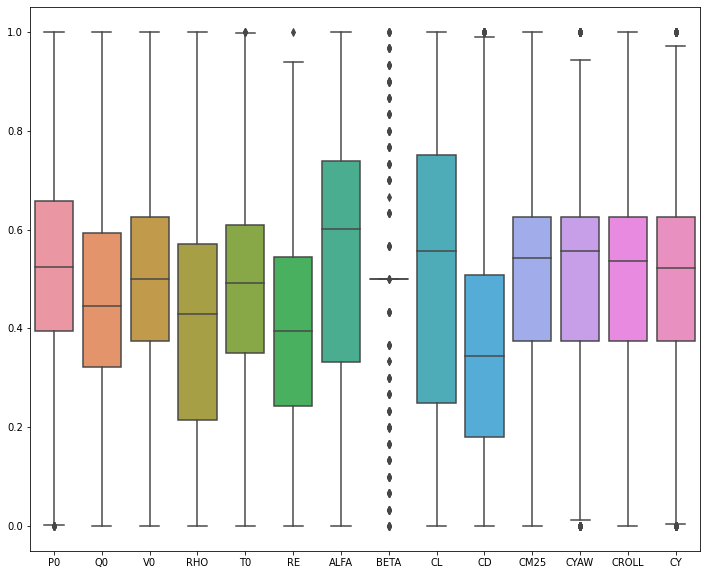

In [24]:
#BoxPlot Analysis
plt.figure(figsize=(12,10))
sns.boxplot(data=df_minmax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


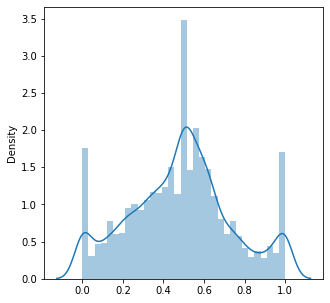

In [25]:
plt.figure(figsize = (5,5))
sns.distplot(df_minmax)

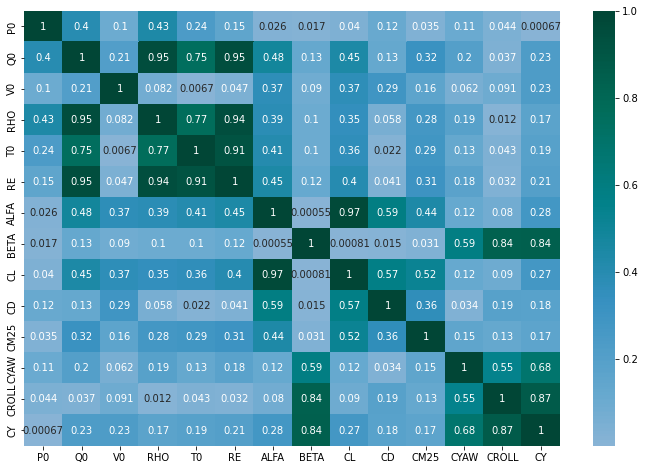

In [21]:
# Data Correlation Analysis
pd.options.display.float_format = '{:,.2f}'.format
cor = df_minmax.corr()
plt.figure(figsize=(12,8))
sns.heatmap(abs(cor), annot=True, cmap='PuBuGn', center=0.117)
plt.show()

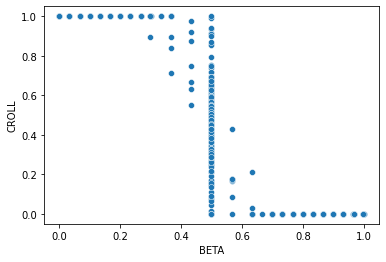

In [26]:
ax = sns.scatterplot(x='BETA', y=('CROLL'), data=df_minmax, cmap='rainbow')

# Contoh Command Menentukan data inputan dan Output

In [28]:
# Menentukan data inputan
dfx = df_minmax.drop(['CL','CD','CM25','CYAW','CROLL','CY'], axis = 1)
dfx.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/dfx_minmax.csv', index=False, header=True)
display(dfx)

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA
0,0.69,0.99,0.69,1.00,0.00,0.94,0.00,0.50
1,0.68,0.96,0.62,1.00,0.02,0.91,0.03,0.50
2,0.67,0.84,0.31,0.93,0.05,0.85,0.07,0.50
3,0.66,0.89,0.56,0.93,0.07,0.88,0.10,0.50
4,0.66,0.86,0.44,0.93,0.07,0.85,0.13,0.50
...,...,...,...,...,...,...,...,...
576,0.65,0.59,0.25,0.71,0.33,0.58,0.81,0.50
577,0.66,0.62,0.38,0.71,0.33,0.61,0.85,0.50
578,0.67,0.77,0.81,0.64,0.34,0.64,0.88,0.50
579,0.69,0.62,0.44,0.64,0.34,0.58,0.90,0.50


In [29]:
# Menentukan data output atau target
dfy = df_minmax.drop(columns=['P0','Q0','V0','RHO','T0','RE','ALFA'])
dfy.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/dfy_minmax.csv', index=False, header=True)
display(dfy)

,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,0.50,0.02,0.69,1.00,0.00,0.58,0.93
1,0.50,0.02,0.63,1.00,0.00,0.67,0.96
2,0.50,0.01,0.54,1.00,0.31,0.52,0.63
3,0.50,0.03,0.44,1.00,0.15,0.69,0.82
4,0.50,0.06,0.36,1.00,0.38,0.52,0.60
...,...,...,...,...,...,...,...
576,0.50,0.94,0.79,0.00,0.62,0.42,0.31
577,0.50,0.95,0.84,0.00,0.53,0.43,0.33
578,0.50,0.91,0.95,0.00,0.10,0.00,0.13
579,0.50,0.88,1.00,0.00,0.65,0.30,0.34


## FEATURE SELECTION 

## 1. Filter Methode (Pearson correlation coefficient)

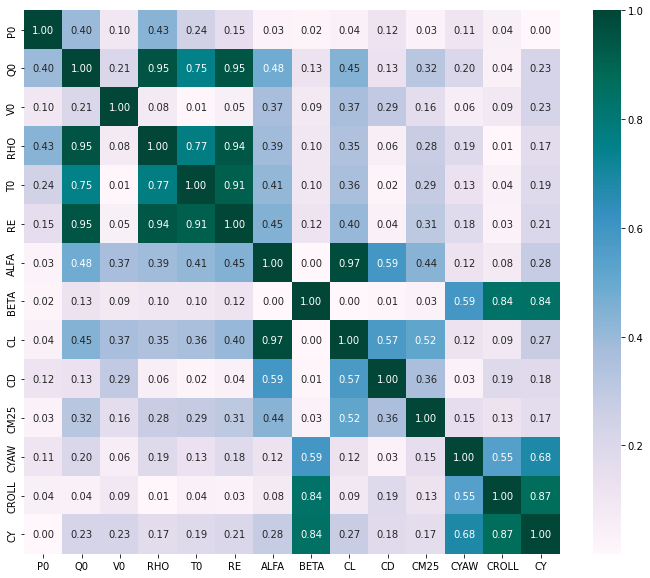

In [30]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_minmax.corr()
sns.heatmap(abs(cor), cmap='PuBuGn' ,annot=True, fmt=".2f")
plt.show()

**Cek Korelasi antara output dengan inputnya **

In [31]:
def correlation_feat(df, threshold=0.75):
    """Returns features that are correlated.
    (Set of all the names of correlated columns)
    
    Param:
    ------
    df: Pandas DataFrame
    threshold: float. Default, 0.75
        threshold for the correlation
    """
    feature_corr = set()  
    corr_matrix = df
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # absolute coeff value
            if abs(corr_matrix.iloc[i, j]
                   ) > threshold:  
                # getting the name of column
                colname = corr_matrix.columns[i]  
                feature_corr.add(colname)
    return feature_corr

correlation_feat(df_minmax.corr(), threshold=0.75)

{'CL', 'CROLL', 'CY', 'RE', 'RHO', 'T0'}

In [32]:
#Correlation with output variable ex. CL
cor_target = abs(cor["CL"])
#Selecting highly correlated features
relevant_features_CL = cor_target[cor_target>0.5]
relevant_features_CL

ALFA   0.97
CL     1.00
CD     0.57
CM25   0.52
Name: CL, dtype: float64

Cek Korelasi yang Kuat antara Input dan Output

In [33]:
#Tabel Korelasi terkuat Input Output 
tabel = abs(cor)
tabel.drop(["CL","CD","CM25","CYAW","CROLL","CY"], inplace = True)
tabel.drop(["ALFA","Q0","RE","P0","V0","RHO","T0", "BETA"], axis=1, inplace = True)
print(tabel)

       CL   CD  CM25  CYAW  CROLL   CY
P0   0.04 0.12  0.03  0.11   0.04 0.00
Q0   0.45 0.13  0.32  0.20   0.04 0.23
V0   0.37 0.29  0.16  0.06   0.09 0.23
RHO  0.35 0.06  0.28  0.19   0.01 0.17
T0   0.36 0.02  0.29  0.13   0.04 0.19
RE   0.40 0.04  0.31  0.18   0.03 0.21
ALFA 0.97 0.59  0.44  0.12   0.08 0.28
BETA 0.00 0.01  0.03  0.59   0.84 0.84


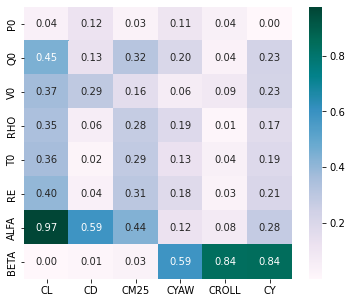

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(6,5))
sns.heatmap(tabel, cmap='PuBuGn' ,annot=True, fmt=".2f")
plt.show()

# Contoh Code memisahkan data hanya train dan test

In [35]:
# memisahkan data untuk train dan test dari data Normalisasi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=None, shuffle=False)

In [36]:
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(406, 8)
(406, 7)
testing dataset:
(175, 8)
(175, 7)


### Contoh Code memisahkan data Train, Validation dan test

In [37]:
# memisahkan data untuk training, validation dan testing dari data Normalisasi Untuk target CL
from fast_ml.model_development import train_valid_test_split
df_test = df_minmax.drop(['CD','CM25','CYAW','CROLL','CY'], axis = 1)
X_train2, y_train2, X_valid, y_valid, X_test2, y_test2 = train_valid_test_split(df_test, target='CL', train_size=0.8, valid_size=0.1, test_size=0.1)

In [38]:
print('training dataset')
print(X_train2.shape)
print(y_train2.shape)
print('testing dataset:')
print(X_test2.shape)
print(y_test2.shape)
print('validation dataset:')
print(X_valid.shape)
print(y_valid.shape)

training dataset
(464, 8)
(464,)
testing dataset:
(59, 8)
(59,)
validation dataset:
(58, 8)
(58,)


# Code memisahkan data training dan testing untuk Per target

In [39]:
# memisahkan data untuk training dan testing dari data Normalisasi Untuk masing2 target 
X = df_minmax.drop(columns=['CL', 'CD', 'CM25', 'CYAW', 'CROLL', 'CY'])   #Feature Matrix
a = df_minmax['CL']          #Target Variable
b = df_minmax['CD']          #Target Variable
c = df_minmax['CM25']          #Target Variable
d = df_minmax['CYAW']          #Target Variable
e = df_minmax['CROLL']          #Target Variable
f = df_minmax['CY']          #Target Variable
X

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA
0,0.69,0.99,0.69,1.00,0.00,0.94,0.00,0.50
1,0.68,0.96,0.62,1.00,0.02,0.91,0.03,0.50
2,0.67,0.84,0.31,0.93,0.05,0.85,0.07,0.50
3,0.66,0.89,0.56,0.93,0.07,0.88,0.10,0.50
4,0.66,0.86,0.44,0.93,0.07,0.85,0.13,0.50
...,...,...,...,...,...,...,...,...
576,0.65,0.59,0.25,0.71,0.33,0.58,0.81,0.50
577,0.66,0.62,0.38,0.71,0.33,0.61,0.85,0.50
578,0.67,0.77,0.81,0.64,0.34,0.64,0.88,0.50
579,0.69,0.62,0.44,0.64,0.34,0.58,0.90,0.50


# Sequential feature selection(SFS) 

In SFS variant features are sequentially added to an empty set of features until the addition of extra features does not reduce the criterion.

Mathematically if the input data in the algorithm is 
image.png

Then the output will be : 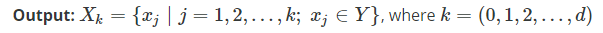


Where the selected features are k and K<d.

In the initialization X is a null set and k=0 (where k is the size of the subset).

In the termination, the size is k = p where p is the number of desired features.

### Sequential Forwrad Selection Algorithms

In [40]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [41]:
forward_selection(X, a)

['ALFA', 'T0']

In [42]:
forward_selection(X, b)

['ALFA', 'T0']

In [43]:
forward_selection(X, c)

['ALFA', 'RE']

In [44]:
forward_selection(X, d)

['BETA', 'Q0', 'ALFA', 'P0']

In [45]:
forward_selection(X, e)

['BETA', 'ALFA', 'Q0']

In [46]:
forward_selection(X, f)

['BETA', 'ALFA', 'V0']

## SFS dengan fungsi built in Python

In [47]:
#importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [48]:
sfs.fit(X, a)
sfs.k_feature_names_  

('P0', 'T0', 'ALFA', 'BETA')

In [49]:
sfs.fit(X, b)
sfs.k_feature_names_  

('Q0', 'T0', 'ALFA', 'BETA')

In [50]:
sfs.fit(X, c)
sfs.k_feature_names_  

('V0', 'T0', 'RE', 'ALFA')

In [51]:
sfs.fit(X, d)
sfs.k_feature_names_  

('P0', 'Q0', 'ALFA', 'BETA')

In [52]:
sfs.fit(X, e)
sfs.k_feature_names_  

('Q0', 'RHO', 'ALFA', 'BETA')

In [53]:
sfs.fit(X, f)
sfs.k_feature_names_  

('P0', 'V0', 'ALFA', 'BETA')

# Sequential Backward Selection (SBS)

In [54]:
def backward_elimination(data, target,significance_level = 0.1):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [55]:
backward_elimination(X, a)

['P0', 'Q0', 'V0', 'RHO', 'T0', 'ALFA']

In [56]:
backward_elimination(X, b)

['P0', 'RHO', 'T0', 'ALFA']

In [57]:
backward_elimination(X, c)

['P0', 'Q0', 'V0', 'T0', 'ALFA']

In [58]:
backward_elimination(X, d)

['Q0', 'V0', 'RE', 'ALFA', 'BETA']

In [59]:
backward_elimination(X, e)

['P0', 'Q0', 'V0', 'RHO', 'T0', 'RE', 'ALFA', 'BETA']

In [60]:
backward_elimination(X, f)

['P0', 'Q0', 'RHO', 'RE', 'ALFA', 'BETA']

## SBS with built in function Python

In [61]:
X1 = np.array(X)
sbs = SFS(LinearRegression(),
         k_features=4,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X1, a)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'V0', 'ALFA'], dtype=object)

In [62]:
sbs.fit(X1, b)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'RHO', 'T0', 'ALFA'], dtype=object)

In [63]:
sbs.fit(X1, c)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'V0', 'T0', 'ALFA'], dtype=object)

In [64]:
sbs.fit(X1, d)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['Q0', 'V0', 'ALFA', 'BETA'], dtype=object)

In [65]:
sbs.fit(X1, e)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'RE', 'ALFA', 'BETA'], dtype=object)

In [66]:
sbs.fit(X1, f)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['Q0', 'RE', 'ALFA', 'BETA'], dtype=object)

# Sequential Floating Selection

In [67]:
#Sequential Floating Selection untuk target CL
X1 = np.array(X)
sbs = SFS(LinearRegression(),
         k_features=4,
         forward=False,
         floating=True,
         cv=0)
sbs.fit(X1, a)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'V0', 'ALFA'], dtype=object)

## Embedded Selection

Best alpha using built-in LassoCV: 0.001991
Best score using built-in LassoCV: 0.947348
Lasso picked 1 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CL')

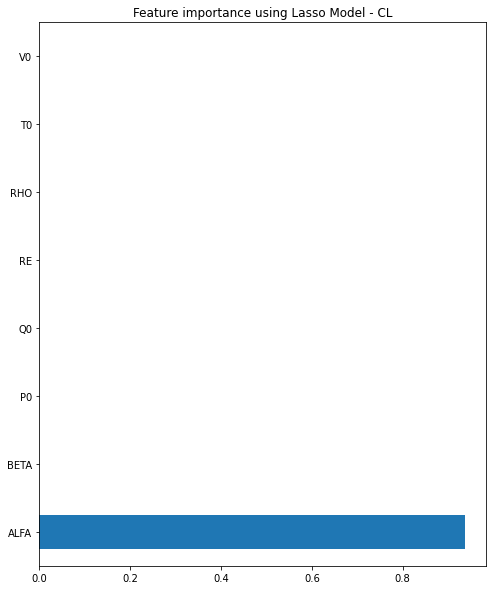

In [68]:
#EmbeddedMethod TEST CL
reg = LassoCV()
reg.fit(X, a)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,a))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CL")

In [69]:
 abs(imp_coef)

ALFA   0.94
BETA   0.00
P0     0.00
Q0     0.00
RE     0.00
RHO    0.00
T0     0.00
V0     0.00
dtype: float64

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.952212
Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using RidgeCV Model - CL')

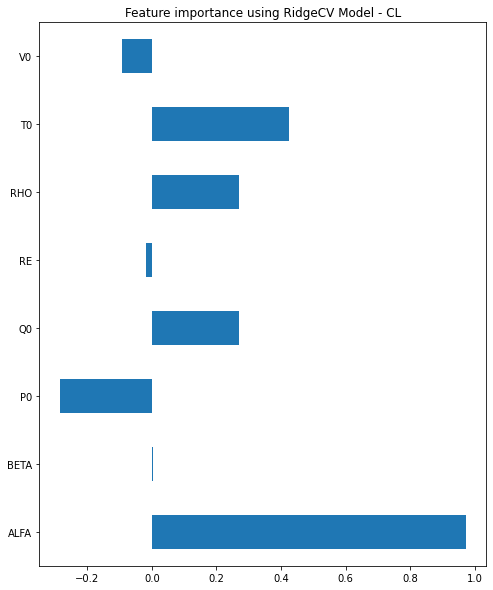

In [70]:
#EmbeddedMethod TEST CL
reg = RidgeCV()
reg.fit(X, a)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,a))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using RidgeCV Model - CL")

In [71]:
abs(imp_coef)

ALFA   0.97
BETA   0.00
P0     0.28
Q0     0.27
RE     0.02
RHO    0.27
T0     0.43
V0     0.09
dtype: float64

Best alpha using built-in LassoCV: 0.000724
Best score using built-in LassoCV: 0.430666
Lasso picked 5 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CD')

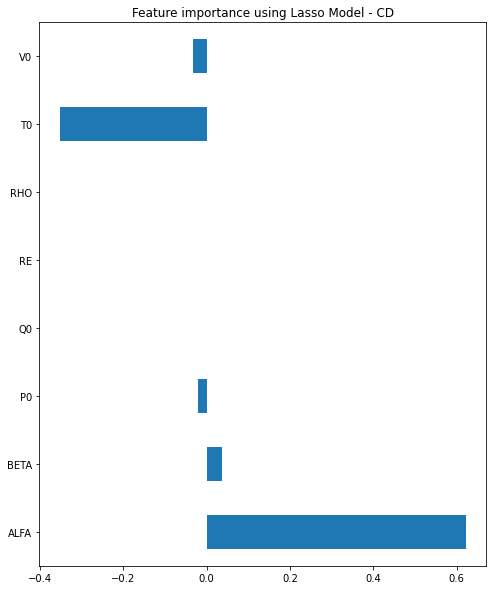

In [72]:
#EmbeddedMethod TEST CD
reg = LassoCV()
reg.fit(X, b)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CD")

In [73]:
abs(imp_coef)

ALFA   0.62
BETA   0.04
P0     0.02
Q0     0.00
RE     0.00
RHO    0.00
T0     0.35
V0     0.03
dtype: float64

In [74]:
#EmbeddedMethod TEST CD
reg = RidgeCV()
reg.fit(X, b)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.439958
Lasso picked 8 variables and eliminated the other 0 variables


ALFA   0.63
BETA   0.06
P0     0.26
Q0     0.21
RE     0.51
RHO    0.60
T0     0.65
V0     0.05
dtype: float64

Best alpha using built-in LassoCV: 0.003305
Best score using built-in LassoCV: 0.202870
Lasso picked 4 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CM25')

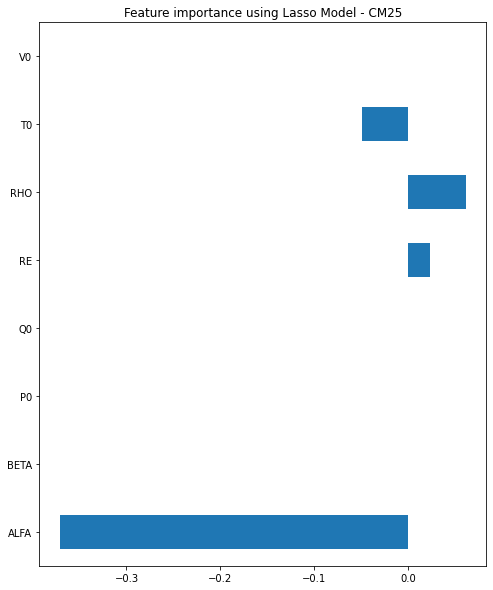

In [75]:
#EmbeddedMethod TEST CM25
reg = LassoCV()
reg.fit(X, c)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,c))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CM25")

In [76]:
abs(imp_coef)

ALFA   0.37
BETA   0.00
P0     0.00
Q0     0.00
RE     0.02
RHO    0.06
T0     0.05
V0     0.00
dtype: float64

In [77]:
#EmbeddedMethod TEST CM25
reg = RidgeCV()
reg.fit(X, c)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: -1.046405
Lasso picked 8 variables and eliminated the other 0 variables


ALFA   0.36
BETA   0.02
P0     0.52
Q0     0.44
RE     0.26
RHO    0.26
T0     1.10
V0     0.23
dtype: float64

Best alpha using built-in LassoCV: 0.002276
Best score using built-in LassoCV: 0.370575
Lasso picked 4 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CYAW')

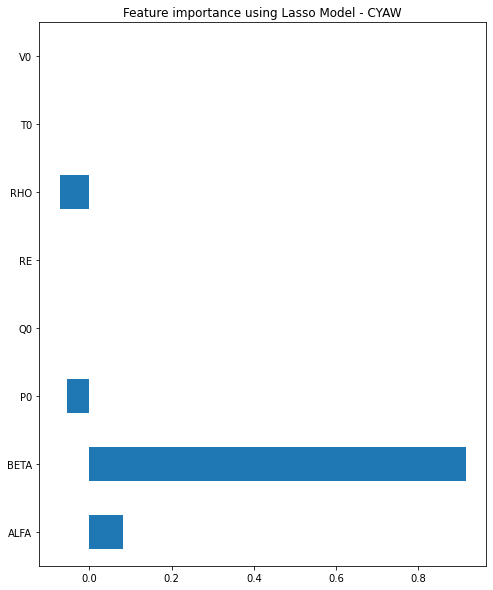

In [78]:
#EmbeddedMethod TEST CYAW
reg = LassoCV()
reg.fit(X, d)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,d))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CYAW")

In [79]:
abs(imp_coef)

ALFA   0.08
BETA   0.92
P0     0.05
Q0     0.00
RE     0.00
RHO    0.07
T0     0.00
V0     0.00
dtype: float64

In [80]:
#EmbeddedMethod TEST CYAW
reg = RidgeCV()
reg.fit(X, d)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: -0.537571
Lasso picked 8 variables and eliminated the other 0 variables


ALFA   0.11
BETA   0.94
P0     0.07
Q0     0.06
RE     0.02
RHO    0.06
T0     0.00
V0     0.04
dtype: float64

Best alpha using built-in LassoCV: 0.001358
Best score using built-in LassoCV: 0.724008
Lasso picked 5 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CROLL')

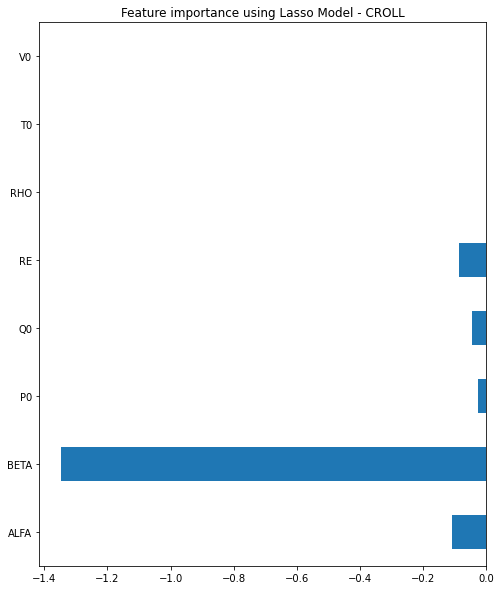

In [81]:
#EmbeddedMethod TEST CROLL
reg = LassoCV()
reg.fit(X, e)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,e))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CROLL")

In [82]:
abs(imp_coef)

ALFA   0.11
BETA   1.35
P0     0.03
Q0     0.04
RE     0.09
RHO    0.00
T0     0.00
V0     0.00
dtype: float64

In [83]:
#EmbeddedMethod TEST CROLL
reg = RidgeCV()
reg.fit(X, e)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: -1.398934
Lasso picked 8 variables and eliminated the other 0 variables


ALFA   0.16
BETA   1.40
P0     0.37
Q0     0.44
RE     0.47
RHO    0.34
T0     0.42
V0     0.17
dtype: float64

Best alpha using built-in LassoCV: 0.001374
Best score using built-in LassoCV: 0.791415
Lasso picked 3 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CY')

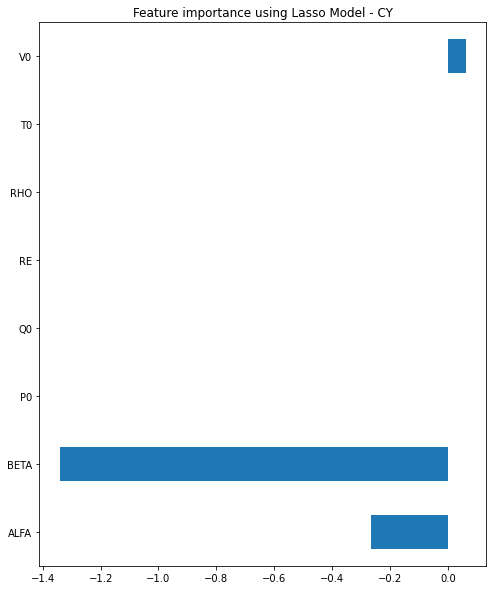

In [84]:
#EmbeddedMethod TEST CY
reg = LassoCV()
reg.fit(X, f)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,f))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CY")

In [85]:
abs(imp_coef)

ALFA   0.27
BETA   1.34
P0     0.00
Q0     0.00
RE     0.00
RHO    0.00
T0     0.00
V0     0.06
dtype: float64

In [86]:
#EmbeddedMethod TEST CY
reg = RidgeCV()
reg.fit(X, f)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: -1.756240
Lasso picked 8 variables and eliminated the other 0 variables


ALFA   0.28
BETA   1.38
P0     0.14
Q0     0.18
RE     0.45
RHO    0.31
T0     0.03
V0     0.09
dtype: float64

# Using a random forest to select important features for regression

In [87]:
reg = ske.RandomForestRegressor()
reg.fit(X, a)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'T0', 'P0', 'RE', 'BETA', 'Q0', 'V0', 'RHO'], dtype=object)

Text(0.5, 1.0, 'Features importance')

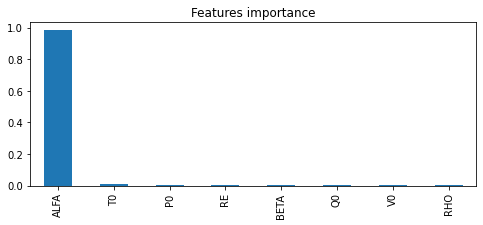

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

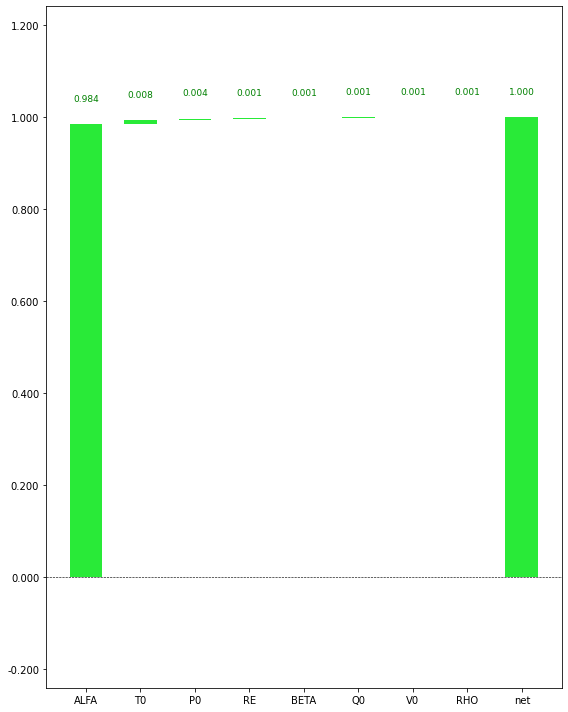

In [90]:
waterfall_chart.plot(labels,fet_imp, sorted_value=True,rotation_value=0,formatting='{:,.3f}')

In [89]:
fet_imp

array([9.84233151e-01, 8.35009151e-03, 3.56897715e-03, 1.13406175e-03,
       7.70153468e-04, 7.42499370e-04, 6.19137767e-04, 5.81927987e-04])

In [91]:
reg.fit(X, b)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'T0', 'RE', 'BETA', 'P0', 'RHO', 'Q0', 'V0'], dtype=object)

In [92]:
fet_imp

array([0.96540618, 0.00915452, 0.00681597, 0.00424904, 0.00413676,
       0.00397613, 0.00352931, 0.00273209])

In [93]:
reg.fit(X, c)  #Output CM25
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'P0', 'T0', 'BETA', 'RE', 'RHO', 'Q0', 'V0'], dtype=object)

In [94]:
fet_imp

array([0.41577662, 0.28505494, 0.167984  , 0.03898454, 0.02767526,
       0.02446462, 0.02323154, 0.01682848])

Text(0.5, 1.0, 'Features importance RA u/ CM25')

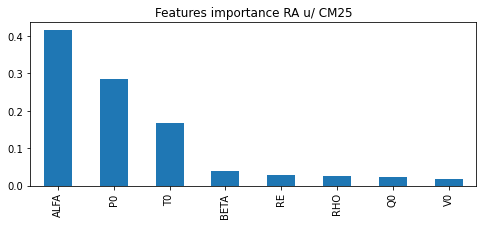

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
feature_name = X.columns.values
labels = feature_name[fet_ind]
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance RA u/ CM25')

In [97]:
reg.fit(X, d)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
labelsfeature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['BETA', 'T0', 'ALFA', 'P0', 'Q0', 'V0', 'RHO', 'RE'], dtype=object)

In [98]:
fet_imp

array([0.43978588, 0.1408698 , 0.14055306, 0.1113275 , 0.06071216,
       0.05082114, 0.03428932, 0.02164115])

In [99]:
reg.fit(X, e)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['BETA', 'ALFA', 'P0', 'T0', 'Q0', 'RE', 'V0', 'RHO'], dtype=object)

In [100]:
fet_imp

array([0.79014559, 0.09103424, 0.03575503, 0.03392759, 0.01525077,
       0.01326369, 0.01203672, 0.00858637])

In [101]:
reg.fit(X, f)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['BETA', 'ALFA', 'T0', 'P0', 'Q0', 'V0', 'RE', 'RHO'], dtype=object)

In [102]:
fet_imp

array([0.84205623, 0.11436578, 0.0142882 , 0.0123954 , 0.00611222,
       0.00465479, 0.00367032, 0.00245706])